<a href="https://colab.research.google.com/github/juanitajimenez1/Portafolio-Adaptable-Responsive-con-Bootstrap-5/blob/main/Bedu_Tecnolochicas_2024_11_Live_Sesi%C3%B3n_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.1 MB/s eta 0:00:00


In [ ]:
import mysql.connector

In [ ]:
cnx = mysql.connector.connect(
    host="ec2-34-210-126-156.us-west-2.compute.amazonaws.com",
    port=3306,
    user="data",
    password="khQ9--mp6LWq97iA",
    database="movielens"
)

In [ ]:
cursor = cnx.cursor()

In [ ]:
cursor.execute("SHOW TABLES")

In [ ]:
result = cursor.fetchall()

In [ ]:
result

[('age_ranges',), ('movies',), ('occupations',), ('ratings',), ('users',)]

In [ ]:
cursor.close()

True

## Hosts de bases de datos

1. ec2-34-210-126-156.us-west-2.compute.amazonaws.com
2. ec2-34-214-179-234.us-west-2.compute.amazonaws.com
3. ec2-35-90-41-95.us-west-2.compute.amazonaws.com
4. ec2-34-218-66-213.us-west-2.compute.amazonaws.com
5. ec2-54-187-31-68.us-west-2.compute.amazonaws.com
6. ec2-35-92-246-244.us-west-2.compute.amazonaws.com
7. ec2-54-212-100-205.us-west-2.compute.amazonaws.com
8. ec2-34-220-87-206.us-west-2.compute.amazonaws.com
9. ec2-52-39-77-116.us-west-2.compute.amazonaws.com
10. ec2-54-202-143-169.us-west-2.compute.amazonaws.com

In [ ]:
cursor = cnx.cursor()

In [ ]:
cursor.execute("SELECT * FROM users")

In [ ]:
result = cursor.fetchall()

In [ ]:
# Muchos de los datos que recibimos están contenidos dentro de tuplas, que se definen entre paréntesis
# Una tupla es muy parecida a una lista: es una secuencia ordenada de elementos
# La gran diferencia es que las tuplas son inmutables; esto quiere decir que no podemos cambiarlas

result[0]

(1, 'F', 1, 10, '48067')

In [ ]:
cursor.description

[('user_id', 3, None, None, None, None, 0, 53251, 63),
 ('gender', 254, None, None, None, None, 1, 0, 255),
 ('age', 3, None, None, None, None, 1, 32768, 63),
 ('occupation', 3, None, None, None, None, 1, 32768, 63),
 ('cp', 253, None, None, None, None, 1, 0, 255)]

In [ ]:
columns = []

for column in cursor.description:
    columns.append(column[0])

In [ ]:
columns

['user_id', 'gender', 'age', 'occupation', 'cp']

In [ ]:
import pandas as pd

In [ ]:
df_users = pd.DataFrame(result, columns=columns)

In [ ]:
df_users.head()

,user_id,gender,age,occupation,cp
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
# Convertimos la columna user_id en el índice de nuestra tabla y nos deshacemos de la columna

df_users = df_users.set_index("user_id", drop=True)

df_users.head()

,gender,age,occupation,cp
user_id,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


In [ ]:
# movies
cursor.execute("SELECT * FROM movies")
result = cursor.fetchall()
df_movies = pd.DataFrame(result, columns=['movie_id', 'title', 'genres'])
df_movies = df_movies.set_index('movie_id', drop=True)

# users
cursor.execute("SELECT * FROM users")
result = cursor.fetchall()
df_users = pd.DataFrame(result, columns=['user_id', 'gender', 'age', 'occupation', 'cp'])
df_users = df_users.set_index('user_id', drop=True)

# ratings
cursor.execute("SELECT * FROM ratings")
result = cursor.fetchall()
df_ratings = pd.DataFrame(result, columns=['user_id', 'movie_id', 'rating', 'timestamp'])

# age ranges
cursor.execute("SELECT * FROM age_ranges")
result = cursor.fetchall()
df_age_ranges = pd.DataFrame(result, columns=['age_id', 'range'])
df_age_ranges = df_age_ranges.set_index('age_id', drop=True)

# occupations
cursor.execute("SELECT * FROM occupations")
result = cursor.fetchall()
df_occupations = pd.DataFrame(result, columns=['occupation_id', 'description'])
df_occupations = df_occupations.set_index('occupation_id', drop=True)

### Merge

In [ ]:
df_users.head()

,gender,age,occupation,cp
user_id,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


In [ ]:
df_users = df_users.rename(columns={'occupation': 'occupation_id', 'age': 'age_range_id'})

df_users.head()

,gender,age_range_id,occupation_id,cp
user_id,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


In [ ]:
df_occupations.head()

,description
occupation_id,
0,other or not specified
1,academic/educator
2,artist
3,clerical/admin
4,college/grad student


In [ ]:
# El primer DataFrame que le pasamos a pd.merge es el LEFT
# El segundo es el RIGHT
# En este caso usamos como columna pivote occupation_id de la tabla LEFT
# Y el índice de la tabla RIGHT

df_users_full = pd.merge(df_users, df_occupations, left_on="occupation_id", right_index=True)

df_users_full

,gender,age_range_id,occupation_id,cp,description
user_id,,,,,
1,F,1,10,48067,K-12 student
2,M,56,16,70072,self-employed
3,M,25,15,55117,scientist
4,M,45,7,02460,executive/managerial
5,M,25,20,55455,writer
...,...,...,...,...,...
6036,F,25,15,32603,scientist
6037,F,45,1,76006,academic/educator
6038,F,56,1,14706,academic/educator


In [ ]:
df_users_full = df_users_full.rename(columns={'description': 'occupation_name', 'cp': 'zip_code'})
df_users_full = df_users_full[['gender', 'age_range_id', 'occupation_id', 'occupation_name', 'zip_code']]

df_users_full.head()

,gender,age_range_id,occupation_id,occupation_name,zip_code
user_id,,,,,
1,F,1,10,K-12 student,48067
2,M,56,16,self-employed,70072
3,M,25,15,scientist,55117
4,M,45,7,executive/managerial,02460
5,M,25,20,writer,55455


## Reto 3

In [ ]:
df_age_ranges.head()

,range
age_id,
1,Under 18
18,18-24
25,25-34
35,35-44
45,45-49


In [ ]:
df_age_ranges = df_age_ranges.rename(columns={'range': 'age_range'})

df_age_ranges.head()

,age_range
age_id,
1,Under 18
18,18-24
25,25-34
35,35-44
45,45-49


In [ ]:
df_age_ranges.index.name = "age_range_id"

df_age_ranges.head()

,age_range
age_range_id,
1,Under 18
18,18-24
25,25-34
35,35-44
45,45-49


In [ ]:
df_users_full = pd.merge(df_users_full, df_age_ranges, left_on="age_range_id", right_index=True)

df_users_full.head()

,gender,age_range_id,occupation_id,occupation_name,zip_code,age_range
user_id,,,,,,
1,F,1,10,K-12 student,48067,Under 18
2,M,56,16,self-employed,70072,56+
3,M,25,15,scientist,55117,25-34
4,M,45,7,executive/managerial,02460,45-49
5,M,25,20,writer,55455,25-34


In [ ]:
df_users_full.columns

Index(['gender', 'age_range_id', 'occupation_id', 'occupation_name',
       'zip_code', 'age_range'],
      dtype='object')

In [ ]:
df_users_full = df_users_full[['gender', 'age_range_id', 'age_range', 'occupation_id', 'occupation_name', 'zip_code']]

df_users_full.head()

,gender,age_range_id,age_range,occupation_id,occupation_name,zip_code
user_id,,,,,,
1,F,1,Under 18,10,K-12 student,48067
2,M,56,56+,16,self-employed,70072
3,M,25,25-34,15,scientist,55117
4,M,45,45-49,7,executive/managerial,02460
5,M,25,25-34,20,writer,55455


## Groupby

In [ ]:
df_users_full.head()

,gender,age_range_id,age_range,occupation_id,occupation_name,zip_code
user_id,,,,,,
1,F,1,Under 18,10,K-12 student,48067
2,M,56,56+,16,self-employed,70072
3,M,25,25-34,15,scientist,55117
4,M,45,45-49,7,executive/managerial,02460
5,M,25,25-34,20,writer,55455


In [ ]:
# SIEMPRE tengo que agregar mis valores al final del groupby
# Hay agregaciones que puedo aplicar a mis grupos enteros, como size()

df_users_full.groupby("occupation_id").size()

,0
occupation_id,
0,711
1,528
2,267
3,173
4,759
5,112
6,236
7,679
8,17


In [ ]:
# Pero también puedo aplicar las agregaciones a columnas específicas de mis subgrupos

df_users_full.groupby("occupation_id")["occupation_name"].value_counts()

,,count
occupation_id,occupation_name,
0,other or not specified,711
1,academic/educator,528
2,artist,267
3,clerical/admin,173
4,college/grad student,759
5,customer service,112
6,doctor/health care,236
7,executive/managerial,679
8,farmer,17


In [ ]:
# Puedo hacer dobles, triples, etc agrupaciones
# Los grupos se can conformando en el orden de lo que yo defino

df_users_full.groupby(["age_range", "occupation_id"])[["occupation_name"]].value_counts()

age_range  occupation_id  occupation_name       
18-24      0              other or not specified    106
           1              academic/educator          45
           2              artist                     44
           3              clerical/admin             18
           4              college/grad student      534
                                                   ... 
Under 18   12             programmer                  1
           13             retired                     1
           14             sales/marketing             2
           17             technician/engineer         2
           19             unemployed                 12
Name: count, Length: 134, dtype: int64

In [ ]:
temp = df_users_full.groupby(["age_range", "occupation_id"])["occupation_name"].value_counts()

In [ ]:
temp.loc["Under 18"]

,,count
occupation_id,occupation_name,
0,other or not specified,27
1,academic/educator,4
2,artist,3
4,college/grad student,3
7,executive/managerial,2
8,farmer,1
10,K-12 student,163
11,lawyer,1
12,programmer,1


In [ ]:
temp.loc["56+"]

,,count
occupation_id,occupation_name,
0,other or not specified,33
1,academic/educator,55
2,artist,12
3,clerical/admin,12
5,customer service,1
6,doctor/health care,21
7,executive/managerial,39
8,farmer,3
9,homemaker,4


In [ ]:
temp.loc[("56+", 10)]

,count
occupation_name,
K-12 student,1


In [ ]:
# En caso de que no haya un método para directamente aplicar la agregación (como size o value_counts),
# puedo pasarle la función que quiero aplicar al método "agg"

df_users_full.groupby("age_range")["occupation_name"].agg(pd.Series.mode)

,occupation_name
age_range,
18-24,college/grad student
25-34,other or not specified
35-44,executive/managerial
45-49,academic/educator
50-55,executive/managerial
56+,retired
Under 18,K-12 student


In [ ]:
# Con el método agg, puedo pasar más de una agregación que quiero aplicar, como string o directamente la función

df_users_full.groupby("age_range")["occupation_name"].agg(["size", pd.Series.mode])

,size,mode
age_range,,
18-24,1103,college/grad student
25-34,2096,other or not specified
35-44,1193,executive/managerial
45-49,550,academic/educator
50-55,496,executive/managerial
56+,380,retired
Under 18,222,K-12 student


In [ ]:
df_users_full.groupby("gender")["age_range"].agg(["size", pd.Series.mode])

,size,mode
gender,,
F,1709,25-34
M,4331,25-34


In [ ]:
# Si tenemos una columna numérica, podemos aplicar agregaciones que se aplican a números
# En este caso la columna age_range_id no es REALMENTE numérica, pero sí representa
# el número inferior en el rango de edad, entonces vamos a utilizarlo como muestra

df_users_full.groupby("gender")["age_range_id"].agg(['mean', 'median', 'std'])

,mean,median,std
gender,,,
F,30.859567,25.0,13.242564
M,30.552297,25.0,12.757110


## Reto 4

In [ ]:
df_ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
df_mean_of_ratings = df_ratings.groupby('movie_id')['rating'].mean()

df_mean_of_ratings.head()

,rating
movie_id,
1,4.146846
2,3.201141
3,3.016736
4,2.729412
5,3.006757


In [ ]:
# sort_values ordena una Serie o DataFrame por valor
# ascending=False me indica que vamos a comenzar por el valor más alto y vamos a ir bajando en orden hasta el más bajo
# .head(50) me regresa solamente los primeros 50 elementos, por lo tanto, los 50 mejores evaluados

df_top_50_movies = df_mean_of_ratings.sort_values(ascending=False).head(50)

In [ ]:
df_top_50_movies.head()

,rating
movie_id,
989,5.0
3881,5.0
1830,5.0
3382,5.0
787,5.0


In [ ]:
df_movies.head()

,title,genres
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [ ]:
 df_movies_full = pd.merge(df_top_50_movies, df_movies, left_index=True, right_index=True)

 df_movies_full.head(20)

,rating,title,genres
movie_id,,,
989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
3881,5.000000,Bittersweet Motel (2000),Documentary
1830,5.000000,Follow the Bitch (1998),Comedy
3382,5.000000,Song of Freedom (1936),Drama
787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
3280,5.000000,"Baby, The (1973)",Horror
3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
3233,5.000000,Smashing Time (1967),Comedy
3172,5.000000,Ulysses (Ulisse) (1954),Adventure


In [ ]:
def plotting_best_50(las_mejores_50):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 20))
    ax.set_title('Top 50 Movies with Best Ratings')
    # Specify x and y using keyword arguments
    splot = sns.barplot(x='rating', y='title', data=las_mejores_50, ax=ax) # Changed this line to provide data and x, y as keyword arguments
    ax.set(xlabel='Rating', ylabel='Movie Title')

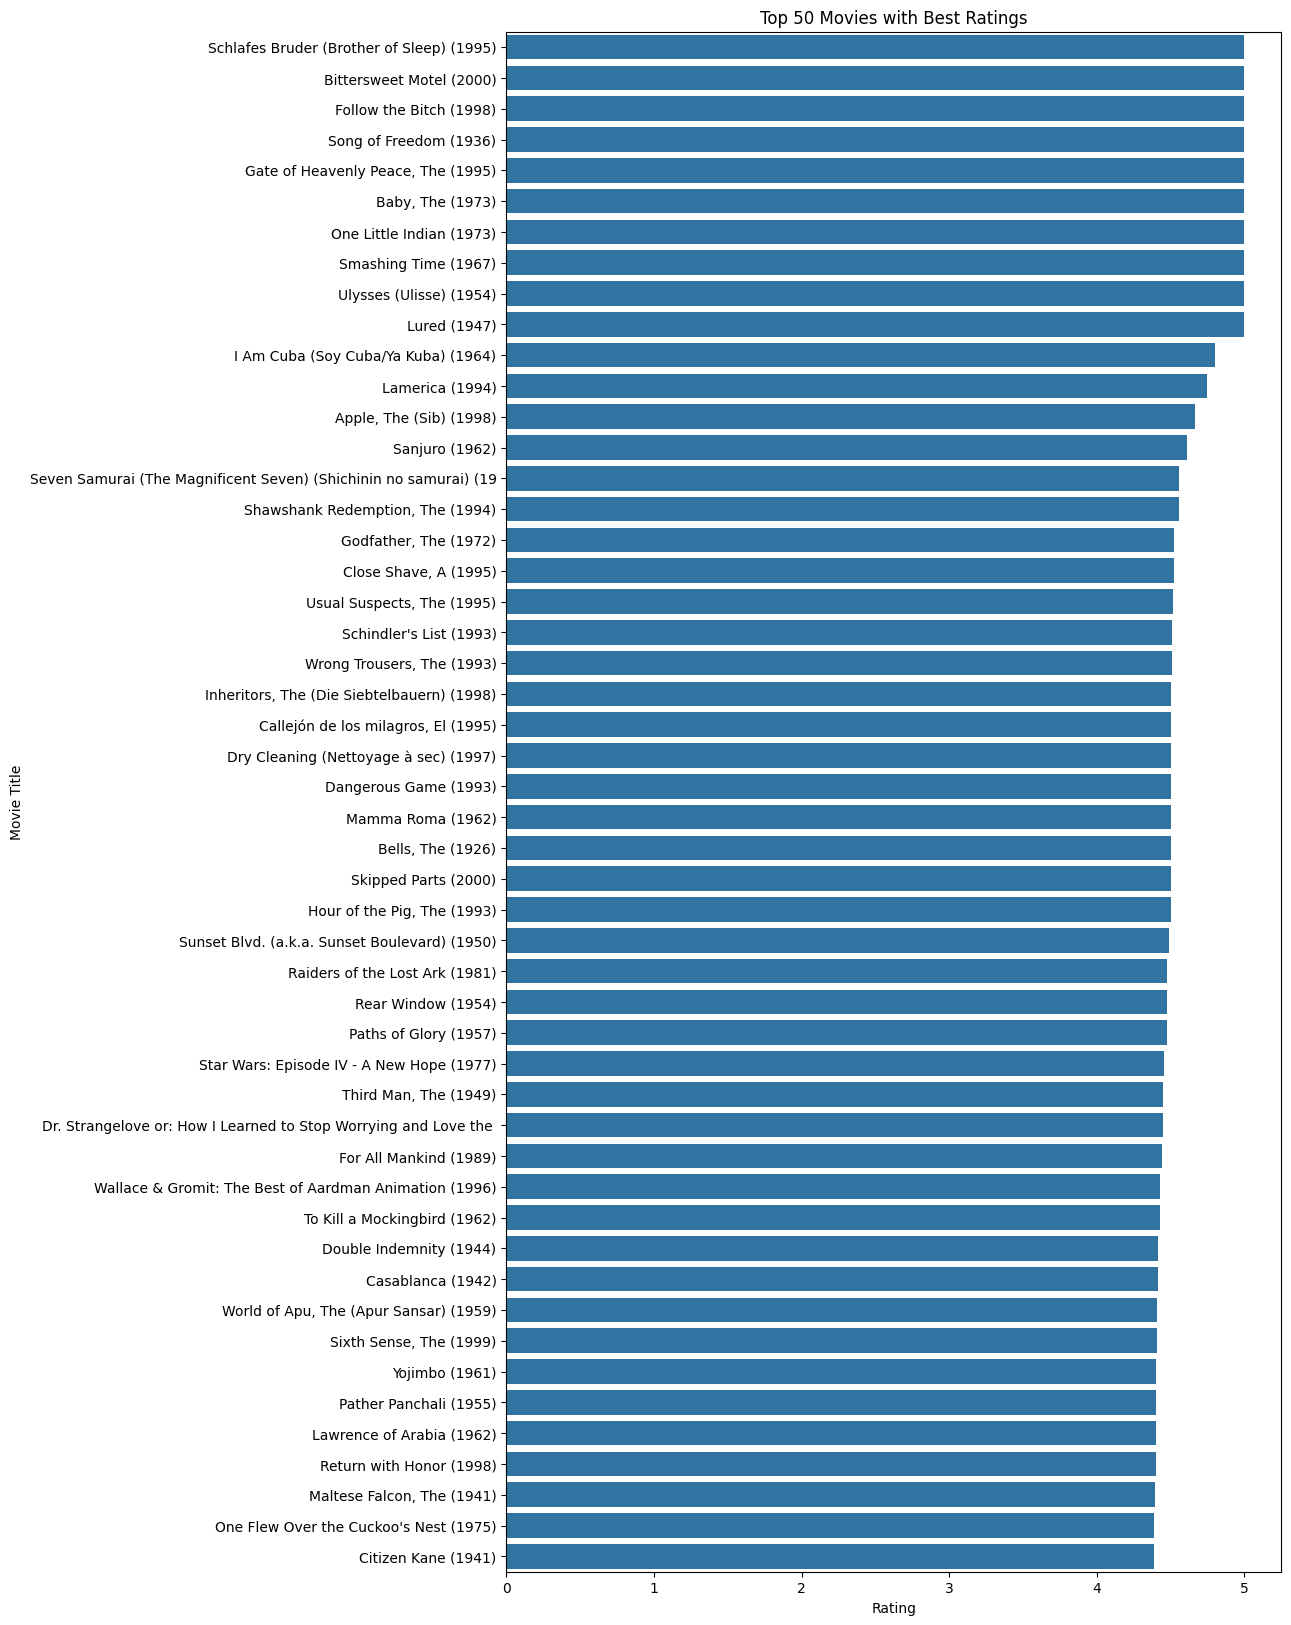

In [ ]:
plotting_best_50(df_movies_full)

## Reto 5

In [ ]:
df_ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
df_rating_count_per_movie = df_ratings.groupby('movie_id')['rating'].count()

df_rating_count_per_movie.head()

,rating
movie_id,
1,2077
2,701
3,478
4,170
5,296


In [ ]:
# Como df_rating_count_per_movie es una Serie, no necesitamos indexar una columna en específico

df_rating_count_per_movie > 2500

,rating
movie_id,
1,False
2,False
3,False
4,False
5,False
...,...
3948,False
3949,False
3950,False


In [ ]:
# Los ids de las pelis con más de 2500 evaluaciones

most_rated_movies =  df_rating_count_per_movie[df_rating_count_per_movie > 2500].index

In [ ]:
df_ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
# Esta función recibe una lista de ids (id_list) y un id (id_)
# hace un chequeo con id_ in id_list para revisar si el id está en la lista
# si lo encuentra, regresa True; si no, regresa False
# La razón por la que usamos id_ con guión bajo, es porque la palabra id solita es una palabra que Python utiliza para otras cosas

def id_in_id_list(id_list, id_):
    return id_ in id_list

In [ ]:
# Voy a utilizar apply + lambda para aplicarle la función a la columna movie_id de df_ratings

filter_most_rated_movies = df_ratings['movie_id'].apply(lambda x: id_in_id_list(most_rated_movies, x))

filter_most_rated_movies.head()

,movie_id
0,False
1,False
2,False
3,False
4,False


In [ ]:
df_ratings.shape

(1000209, 4)

In [ ]:
df_ratings_most_rated = df_ratings[filter_most_rated_movies]

df_ratings_most_rated.shape

(35582, 4)

In [ ]:
df_ratings_most_rated.head()

,user_id,movie_id,rating,timestamp
22,1,1270,5,978300055
44,1,260,4,978300760
48,1,2028,5,978301619
51,1,608,4,978301398
64,2,1210,4,978298151


In [ ]:
df_movies.head()

,title,genres
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_filtered_with_name = pd.merge(df_ratings_most_rated, df_movies['title'], left_on='movie_id', right_index=True)

ratings_filtered_with_name.head()

,user_id,movie_id,rating,timestamp,title
22,1,1270,5,978300055,Back to the Future (1985)
44,1,260,4,978300760,Star Wars: Episode IV - A New Hope (1977)
48,1,2028,5,978301619,Saving Private Ryan (1998)
51,1,608,4,978301398,Fargo (1996)
64,2,1210,4,978298151,Star Wars: Episode VI - Return of the Jedi (1983)


In [ ]:
def visualizar_boxplots(ratings_filtrados_con_nombre):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Distribución de Ratings de las películas con más de 2500 valoraciones')
    plot = sns.boxplot(x='title', y='rating', data=ratings_filtrados_con_nombre, ax=ax)
    ax.set(xlabel=None, ylabel='Rating')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

<ipython-input-113-e8666f09b7b6>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


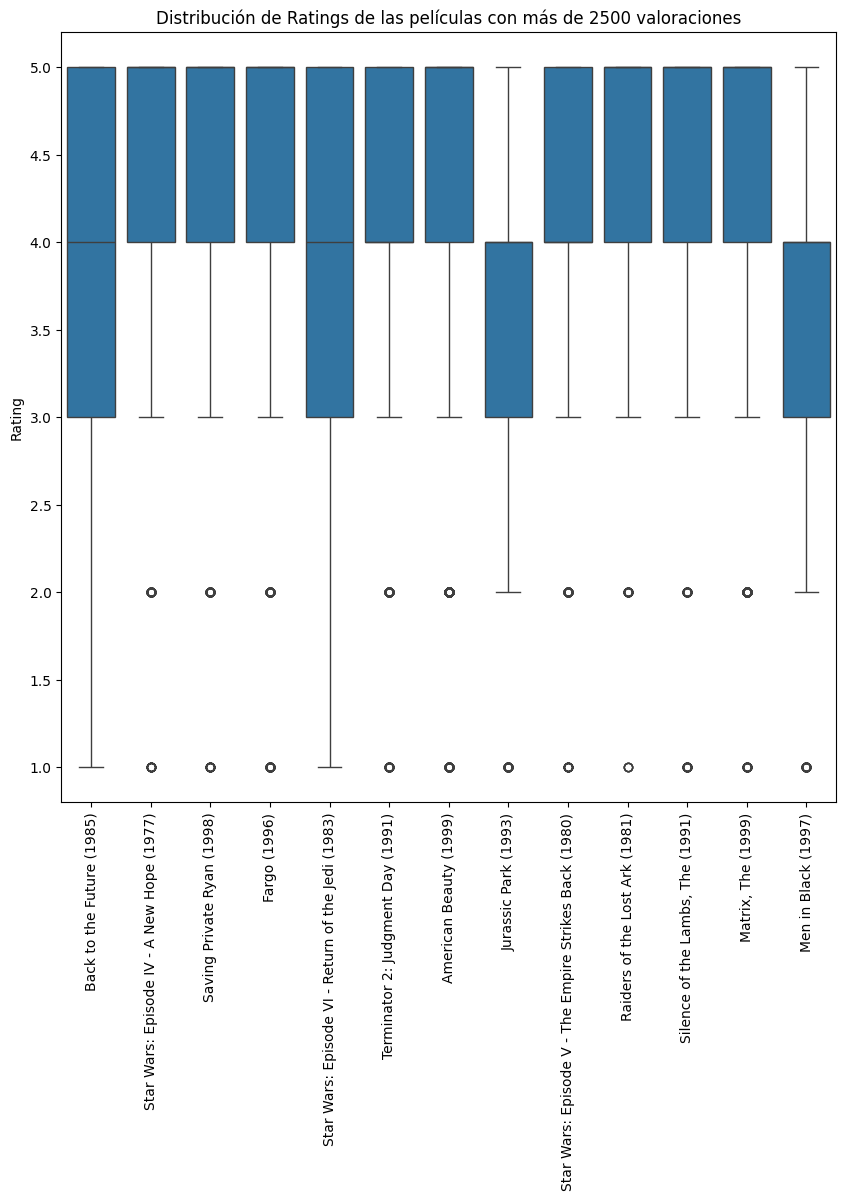

In [ ]:
visualizar_boxplots(ratings_filtered_with_name)

## Reto 6

In [ ]:
df_users_full.head()

,gender,age_range_id,age_range,occupation_id,occupation_name,zip_code
user_id,,,,,,
1,F,1,Under 18,10,K-12 student,48067
2,M,56,56+,16,self-employed,70072
3,M,25,25-34,15,scientist,55117
4,M,45,45-49,7,executive/managerial,02460
5,M,25,25-34,20,writer,55455


In [ ]:
df_ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
df_ratings_with_occupation = pd.merge(df_ratings, df_users_full['occupation_name'], left_on='user_id', right_index=True)

df_ratings_with_occupation.head()

,user_id,movie_id,rating,timestamp,occupation_name
0,1,1193,5,978300760,K-12 student
1,1,661,3,978302109,K-12 student
2,1,914,3,978301968,K-12 student
3,1,3408,4,978300275,K-12 student
4,1,2355,5,978824291,K-12 student


In [ ]:
df_ratings_of_scientists = df_ratings_with_occupation[df_ratings_with_occupation['occupation_name'] == 'scientist']
df_ratings_of_scientists.head()

,user_id,movie_id,rating,timestamp,occupation_name
182,3,3421,4,978298147,scientist
183,3,1641,2,978298430,scientist
184,3,648,3,978297867,scientist
185,3,1394,4,978298147,scientist
186,3,3534,3,978297068,scientist


In [ ]:
df_ratings_of_scientists = pd.merge(df_ratings_of_scientists, df_movies['title'], left_on='movie_id', right_index=True)

df_ratings_of_scientists.head()

,user_id,movie_id,rating,timestamp,occupation_name,title
182,3,3421,4,978298147,scientist,Animal House (1978)
183,3,1641,2,978298430,scientist,"Full Monty, The (1997)"
184,3,648,3,978297867,scientist,Mission: Impossible (1996)
185,3,1394,4,978298147,scientist,Raising Arizona (1987)
186,3,3534,3,978297068,scientist,28 Days (2000)
